# Chord tutorial

In [1]:
# install PyAudio http://people.csail.mit.edu/hubert/pyaudio/
# pip install pyaudio
import pyaudio
import wave
import sys

# default settings for record and playback
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 22050

In [2]:
import contextlib

wave_file = "datasets/sound/chord.wav"
wf = wave.open(wave_file, 'rb')
data = wf.readframes(-1)

with contextlib.closing(wf) as f:
    FRAMES = f.getnframes()
    RATE = f.getframerate()
    CHANNELS = f.getnchannels()
    DURATION = FRAMES / float(RATE)
    print("Rate: {}, frames: {}, channels: {}, time: {}".format(RATE, FRAMES, CHANNELS, DURATION))

Rate: 22050, frames: 42560, channels: 1, time: 1.9301587301587302


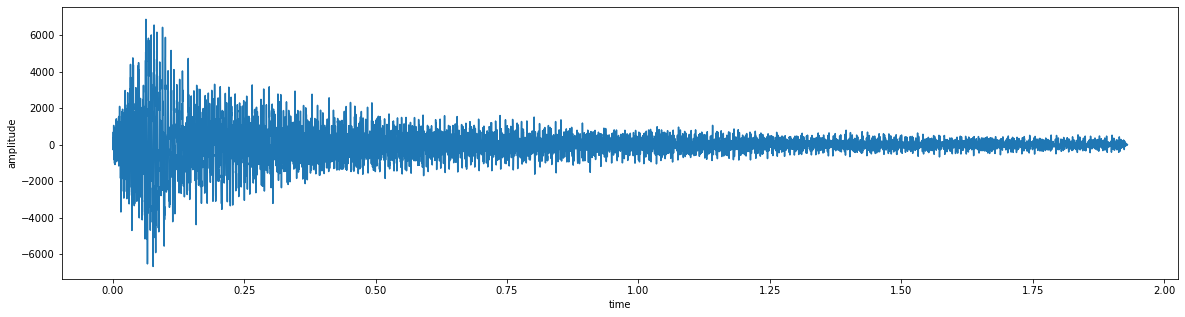

In [3]:
import numpy as np
import matplotlib.pyplot as plt

signal = np.frombuffer(data, np.int16)
time = [float(i) * DURATION / len(signal) for i in range(len(signal))]
plt.figure(figsize=(20, 5))
plt.plot(time, signal)
plt.xlabel("time")
plt.ylabel("amplitude")
plt.show()

1. Convert to frequencies
2. Find major frequencies. Do it automatically (with code, not with your eyes)
3. (**) Can you say what is the chord?

### Convert signal into frequency repreresentation

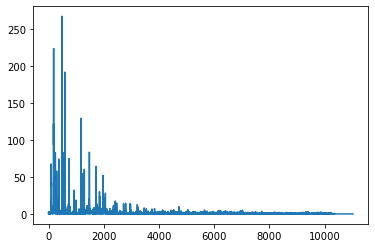

In [4]:
from scipy.fftpack import fft, ifft
from scipy.io import wavfile

# let's use for simplicity 1 second
chord = [v / 16536. for v in signal[:RATE]]

############ TODO #####################################################################
## compute fft, take first half of the array and only absolute values of real numbers #
#######################################################################################

plt.plot(spectrum)
plt.show()

### Volume trick -- 1/sqrt(N)  
Amplutudes and volumes are related like this: the higher the frequency, the less amplitude is needed to obtain desired volume

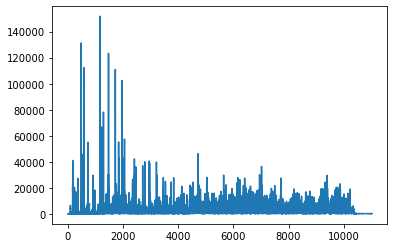

In [5]:
spectrum = [x * (i) for i, x in enumerate(spectrum)]
plt.plot(spectrum)
plt.show()

### Find major frequencies. Spectrum is dsitributed between 0 and RATE

In [ ]:
####################################################################
## TODO: write your code to get major frequencies of the signal   ##
# indices =                                                       ##
####################################################################
indices = []

from numpy.fft import fftfreq

# this computes the frequencies for indices
freqs = fftfreq(RATE, d = 1/RATE)
result = freqs[indices]
print("From major", result, "to less")

### Match your frequencies with notes

In [7]:
notes = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "H"]
note2num = dict((v, k) for k, v in enumerate(notes))
note2freq = dict((n, []) for n in notes)
note2freq["A"] = [220, 440, 880, 1760, 3520, 7040]

step = 2. ** (1 / 12)
for note, arr in note2freq.items():
    if note == "A": continue
    for freq in note2freq["A"]:
        arr.append(round(freq * step ** (note2num[note] - note2num["A"]), 2))
    print(note, *arr, sep="\t\t")

C		130.81		261.63		523.25		1046.5		2093.0		4186.01
C#		138.59		277.18		554.37		1108.73		2217.46		4434.92
D		146.83		293.66		587.33		1174.66		2349.32		4698.64
D#		155.56		311.13		622.25		1244.51		2489.02		4978.03
E		164.81		329.63		659.26		1318.51		2637.02		5274.04
F		174.61		349.23		698.46		1396.91		2793.83		5587.65
F#		185.0		369.99		739.99		1479.98		2959.96		5919.91
G		196.0		392.0		783.99		1567.98		3135.96		6271.93
G#		207.65		415.3		830.61		1661.22		3322.44		6644.88
A#		233.08		466.16		932.33		1864.66		3729.31		7458.62
H		246.94		493.88		987.77		1975.53		3951.07		7902.13
